In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### READING AND UNDERSTANDING DATA

In [2]:
pd.set_option('display.max_columns', 100)
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#checking the number of rows and columns
leads.shape

(9240, 37)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


 #### conversion rate is 38 %

### DATA CLEANING

In [6]:
# dropping some columns that are nor required in the first go i.e Prospect Id and Lead number
leads.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)

In [7]:
leads.shape

(9240, 35)

In [8]:
#finding out the columns that have level "Select"
colswith_select = leads.isin(['Select']).any()
colswith_select

Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper Article                                False
X Education Forums                               False
Newspaper 

#### cols : Specialisation, how did you hear about X education, Lead Profile and city have level : Select

In [9]:
#replacing all Select values to Nan as this level means nothing is selected in that category
leads = leads.replace('Select', np.nan)

In [10]:
#Calculating Null percenatges in each column
round((leads.isnull().sum()/len(leads))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [11]:
#dropping all the columns having null percentage > 40%
leads.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
           'Asymmetrique Profile Score'], axis=1, inplace=True)

In [12]:
#checking the number of cols again
leads.shape

(9240, 28)

In [13]:
#let's check the null percentages again
round((leads.isnull().sum()/len(leads))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### missing value treatment

In [14]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

###### Country Column:

In [15]:

leads['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [16]:
#Since India contributes to ~96% data therefore it is not advisable to consider this. Hence drop this column:
leads.drop('Country', 1 , inplace=True)

###### Specialization column:

In [17]:

leads['Specialization'].value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [18]:
#Creating a seperate category for null values in Specialisation column as it could be that people did not specify this detail
leads['Specialization'] = leads['Specialization'].replace(np.nan, "Not Specified")

###### What is your current occupation column:

In [19]:
leads['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [20]:
#replacing nan values with mostly occuring value in this column i.e Unemployed
leads['What is your current occupation'].fillna('Unemployed', inplace=True)

###### What matters most to you in choosing a course column:

In [21]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [22]:
#since almost the entire data in this column is referring to a single value, therefore we shoud drop this column to remove biasness:
leads.drop('What matters most to you in choosing a course', 1, inplace=True)

###### Tags Column:

In [23]:
leads.Tags.value_counts(normalize=True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [24]:
#replacing nan with "not specified"
leads['Tags'].fillna('Not Specified', inplace=True)

###### City Column:

In [25]:
leads.City.value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [26]:
#replacing nan with Mumbai:
leads.City.replace(np.nan, 'Mumbai', inplace=True)

###### Lead Source column:

In [27]:
#since the null values are only 0.39% therefore removing these rows
leads=leads[~(leads['Lead Source'].isnull())]

###### Total Visits column:

In [28]:
leads['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [29]:
#since mean and median are sae so we can impute the missing values with either.
leads['TotalVisits'].fillna(leads['TotalVisits'].median(), inplace=True)


###### Page Views Per Visit column:


In [30]:
leads['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [31]:
#replacing with median
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(), inplace=True)

###### Last Activity column:

In [32]:
leads['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.701857
SMS Sent                        29.913215
Olark Chat Conversation         10.688784
Page Visited on Website          7.030649
Converted to Lead                4.701747
Email Bounced                    3.526310
Email Link Clicked               2.933099
Form Submitted on Website        1.274305
Unreachable                      1.021641
Unsubscribed                     0.648138
Had a Phone Conversation         0.329562
Approached upfront               0.098869
View in browser link Clicked     0.065912
Email Received                   0.021971
Email Marked Spam                0.021971
Visited Booth in Tradeshow       0.010985
Resubscribed to emails           0.010985
Name: Last Activity, dtype: float64

In [33]:
#replacing with Email Opened
leads['Last Activity'].fillna('Email Opened', inplace=True)

In [34]:
#checking missing values again
round((leads.isnull().sum()/len(leads))*100,2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

#### all missing values have been treated

In [35]:
leads.shape

(9204, 26)

### EDA

In [36]:
leads['Lead Origin'].value_counts(normalize=True)*100

Landing Page Submission    53.074750
API                        38.896132
Lead Add Form               7.442416
Lead Import                 0.586701
Name: Lead Origin, dtype: float64

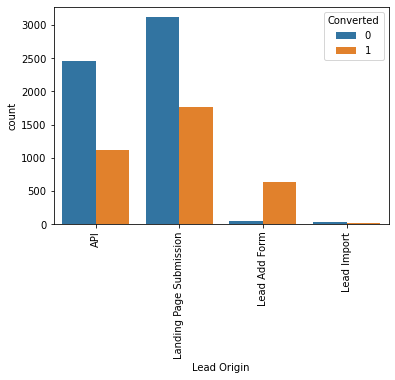

In [37]:
sns.countplot(x='Lead Origin', hue='Converted', data=leads)
plt.xticks(rotation=90)
plt.show()

1. API and Landing Page Submission has maximum number of leads with latter having a better conversion rate.
2. Lead Ad Form has maximum conversion but very low number of leads.

In [38]:
leads['Lead Source'].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [39]:
#replacing google with Google to have uniformity
leads['Lead Source'].replace('google', 'Google', inplace=True)

In [40]:
leads['Lead Source'].value_counts(normalize=True)*100

Google               31.214689
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
Click2call            0.043459
Social Media          0.021730
Live Chat             0.021730
Press_Release         0.021730
Pay per Click Ads     0.010865
blog                  0.010865
WeLearn               0.010865
welearnblog_Home      0.010865
youtubechannel        0.010865
testone               0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [41]:
#combining all low percentage levels to form one single categoty
leads['Lead Source'] = leads['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','bing','Click2call',
                                                    'Social Media','Live Chat','Press_Release','Pay per Click Ads','blog',
                                                   'WeLearn','welearnblog_Home','youtubechannel','testone','NC_EDM'], 'Others')

In [42]:
leads['Lead Source'].value_counts(normalize=True)*100

Google            31.214689
Direct Traffic    27.629292
Olark Chat        19.067797
Organic Search    12.538027
Reference          5.801825
Others             3.748370
Name: Lead Source, dtype: float64

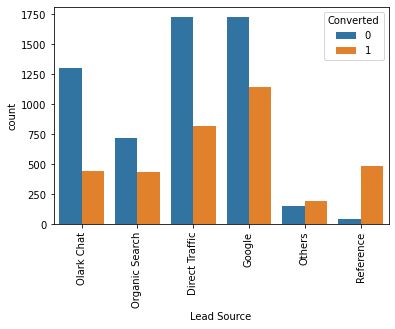

In [43]:
sns.countplot(x='Lead Source', hue='Converted', data=leads)
plt.xticks(rotation=90)
plt.show()

1. Direct Traffic and Google generate maximum number of leads with Google having a better conversion rate.
2. Leads generated through referrals seems to be doing the best with highest conversion.

In [44]:
leads['Do Not Email'].value_counts(normalize=True)*100

No     92.166449
Yes     7.833551
Name: Do Not Email, dtype: float64

In [45]:
leads['Do Not Call'].value_counts(normalize=True)*100

No     99.97827
Yes     0.02173
Name: Do Not Call, dtype: float64

In [46]:
leads['TotalVisits'].describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

count    9204.000000
mean        3.449587
std         4.824662
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [47]:
leads['Total Time Spent on Website'].describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

count    9204.000000
mean      489.005541
std       547.980340
min         0.000000
25%        14.000000
50%       250.000000
75%       938.000000
90%      1380.000000
95%      1562.000000
99%      1839.970000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [48]:
leads['Page Views Per Visit'].describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

count    9204.000000
mean        2.364923
std         2.145999
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

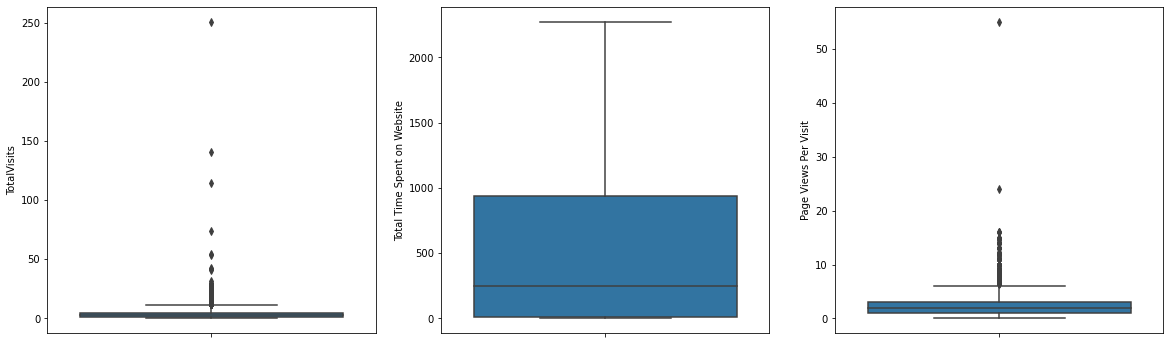

In [49]:
#checking if there are any outliers in the variables
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(20,6))

i = 1
for j in num_vars:
    plt.subplot(1,3,i)
    sns.boxplot(y=j, data=leads)
    i+=1

#### TotalVisits and Page Views Per Visit has outliers and needs to be treated.

In [50]:
# Total Visits:
q = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits<=q)]

In [51]:
# Page Views Per Visit:
q = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[(leads['Page Views Per Visit']<=q)]

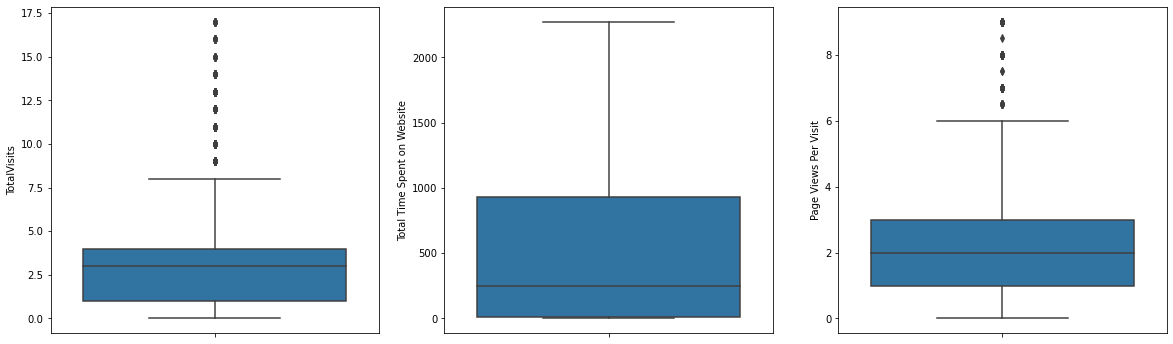

In [52]:
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(20,6))

i = 1
for j in num_vars:
    plt.subplot(1,3,i)
    sns.boxplot(y=j, data=leads)
    i+=1

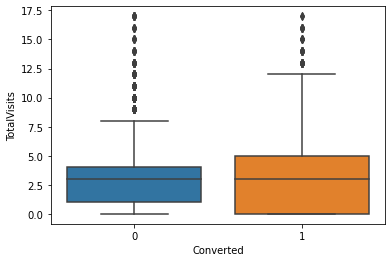

In [53]:
# viewing the numerical variables wrt Converted Column:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

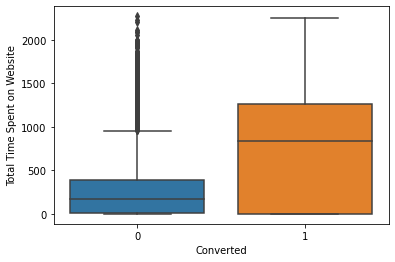

In [54]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

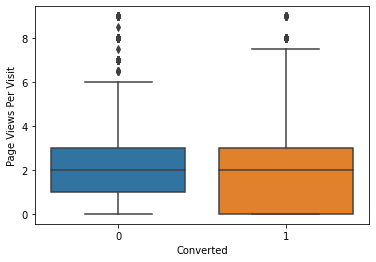

In [55]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

1. The Median for Total Visits is same for converted and non converted leads but the spread is more huge for converted leads which means they visit the website more than poeple who do not convert.

2. The median for converted leads is much higher in case of Total Time spent on the website.

3. Median for Page Views Per visit is same for both converted and non converted leads and not much can be specified here.

4. The point to keep in mind here is that the company should make the website more engaging for customers as people who are spending more time on the website and visiting the website for a good number of times are likely to be hot leads.

In [56]:
leads['Last Activity'].value_counts(normalize=True)*100

Email Opened                    38.502319
SMS Sent                        29.655401
Olark Chat Conversation         10.680362
Page Visited on Website          6.560636
Converted to Lead                4.727192
Email Bounced                    3.523305
Email Link Clicked               2.915838
Form Submitted on Website        1.259112
Unreachable                      1.005081
Unsubscribed                     0.640601
Had a Phone Conversation         0.320300
Approached upfront               0.099404
View in browser link Clicked     0.044179
Email Received                   0.022090
Email Marked Spam                0.022090
Visited Booth in Tradeshow       0.011045
Resubscribed to emails           0.011045
Name: Last Activity, dtype: float64

In [57]:
#combining all low percentage levels to form one single categoty
leads['Last Activity'] = leads['Last Activity'].replace(['Form Submitted on Website','Unreachable','Unsubscribed','Had a Phone Conversation',
                                                    'Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam',
                                                   'Visited Booth in Tradeshow','Resubscribed to emails'], 'Others')

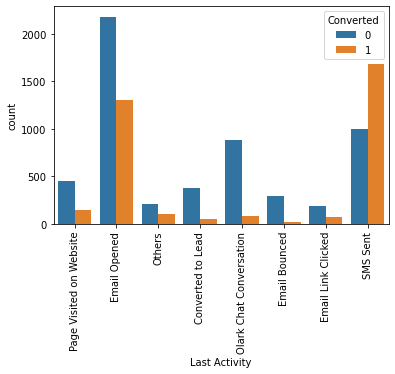

In [58]:
sns.countplot(x='Last Activity', hue='Converted', data=leads)
plt.xticks(rotation=90)
plt.show()

1. There are maximum leads who opened their emails but yet not too many converted.
2. Leads who had their last activity as Olark Chat Conversation clearly do not convert much.
3. Leads with Last Activity as SMS Sent have converted the most.

In [59]:
leads.Specialization.value_counts(normalize=True)*100

Not Specified                        36.801414
Finance Management                   10.558869
Human Resource Management             9.156174
Marketing Management                  9.145129
Operations Management                 5.489287
Business Administration               4.351668
IT Projects Management                3.976143
Supply Chain Management               3.766291
Banking, Investment And Insurance     3.622708
Media and Advertising                 2.186879
Travel and Tourism                    2.098520
International Business                1.910758
Healthcare Management                 1.678816
Hospitality Management                1.214933
E-COMMERCE                            1.181798
Retail Management                     1.049260
Rural and Agribusiness                0.773139
E-Business                            0.618511
Services Excellence                   0.419704
Name: Specialization, dtype: float64

In [60]:
#combining all management specialisations to form one single categoty
leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management',
                                                    'IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management',
                                                   'Retail Management'], 'Management')

In [61]:
leads.Specialization.value_counts(normalize=True)*100

Management                           46.034902
Not Specified                        36.801414
Business Administration               4.351668
Banking, Investment And Insurance     3.622708
Media and Advertising                 2.186879
Travel and Tourism                    2.098520
International Business                1.910758
E-COMMERCE                            1.181798
Rural and Agribusiness                0.773139
E-Business                            0.618511
Services Excellence                   0.419704
Name: Specialization, dtype: float64

In [62]:
#combining all low percentage levels to form one single categoty
leads['Specialization'] = leads['Specialization'].replace(['International Business','E-COMMERCE','Rural and Agribusiness',
                                                   'E-Business','Services Excellence'], 'Others')

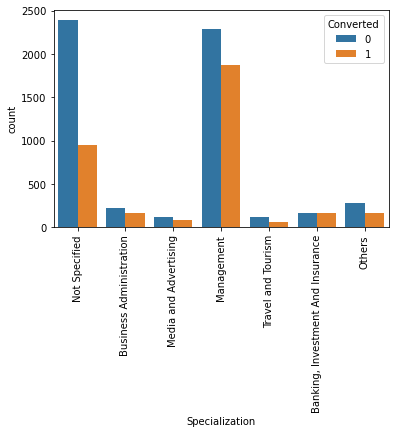

In [63]:

sns.countplot(x='Specialization', hue='Converted', data=leads)
plt.xticks(rotation=90)
plt.show()

1. Most leads are from Managerial roles and also convert the most.
2. Though not many leads but Business Administration people also convert

In [64]:
leads['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              89.739342
Working Professional     7.643031
Student                  2.275237
Other                    0.154628
Housewife                0.110448
Businessman              0.077314
Name: What is your current occupation, dtype: float64

In [65]:
#combining all low percentage levels to form one single categoty
leads['What is your current occupation'] = leads['What is your current occupation'].replace(['Other','Housewife','Businessman'], 'Others')

In [66]:
leads['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              89.739342
Working Professional     7.643031
Student                  2.275237
Others                   0.342390
Name: What is your current occupation, dtype: float64

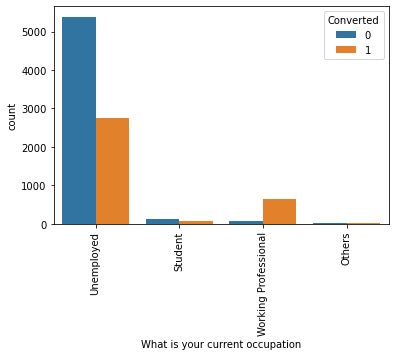

In [67]:
sns.countplot(x='What is your current occupation', hue='Converted', data=leads)
plt.xticks(rotation=90)
plt.show()

1. Max leads are unemployed i.e looking for a job yet not a very good conversion rate.
2. Working Professionals appear to be the hottest leads.

In [68]:
leads['Search'].value_counts(normalize=True)*100

No     99.856417
Yes     0.143583
Name: Search, dtype: float64

In [69]:
leads['Magazine'].value_counts(normalize=True)*100

No    100.0
Name: Magazine, dtype: float64

In [70]:
leads['Newspaper Article'].value_counts(normalize=True)*100

No     99.988955
Yes     0.011045
Name: Newspaper Article, dtype: float64

In [71]:
leads['X Education Forums'].value_counts(normalize=True)*100

No    100.0
Name: X Education Forums, dtype: float64

In [72]:
leads['Newspaper'].value_counts(normalize=True)*100

No     99.988955
Yes     0.011045
Name: Newspaper, dtype: float64

In [73]:
leads['Digital Advertisement'].value_counts(normalize=True)*100

No     99.966865
Yes     0.033135
Name: Digital Advertisement, dtype: float64

In [74]:
leads['Through Recommendations'].value_counts(normalize=True)*100

No     99.933731
Yes     0.066269
Name: Through Recommendations, dtype: float64

In [75]:
leads['Receive More Updates About Our Courses'].value_counts(normalize=True)*100

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [76]:
leads['Get updates on DM Content'].value_counts(normalize=True)*100

No    100.0
Name: Get updates on DM Content, dtype: float64

In [77]:
leads['I agree to pay the amount through cheque'].value_counts(normalize=True)*100

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

#### Deleting all imbalanced or biased columns:

In [78]:
leads.drop(['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
           'Get updates on DM Content','I agree to pay the amount through cheque'],1,inplace=True)

In [79]:
leads.shape

(9054, 14)

In [80]:
leads['A free copy of Mastering The Interview'].value_counts(normalize=True)*100

No     69.096532
Yes    30.903468
Name: A free copy of Mastering The Interview, dtype: float64

In [81]:
leads['Tags'].value_counts(normalize=True)*100

Not Specified                                        36.370665
Will revert after reading the email                  22.299536
Ringing                                              12.955600
Interested in other courses                           5.621825
Already a student                                     5.091672
Closed by Horizzon                                    3.832560
switched off                                          2.617628
Busy                                                  2.032251
Lost to EINS                                          1.877623
Not doing further education                           1.513143
Interested  in full time MBA                          1.292247
Graduation in progress                                1.214933
invalid number                                        0.894632
Diploma holder (Not Eligible)                         0.695825
wrong number given                                    0.508063
opp hangup                                            0

In [82]:
#combining all low percentage levels to form one single categoty
leads['Tags'] = leads['Tags'].replace(['Lost to EINS','Not doing further education','Interested  in full time MBA',
                                      'Graduation in progress','invalid number','Diploma holder (Not Eligible)',
                                      'wrong number given','opp hangup','number not provided',
                                      'in touch with EINS','Lost to Others','Still Thinking',
                                      'In confusion whether part time or DLP','Interested in Next batch',
                                       'Want to take admission but has financial problems',
                                      'Lateral student','Shall take in the next coming month','University not recognized',
                                      'Recognition issue (DEC approval)'], 'Others')

In [83]:
leads['Tags'].value_counts(normalize=True)*100

Not Specified                          36.370665
Will revert after reading the email    22.299536
Ringing                                12.955600
Others                                  9.178264
Interested in other courses             5.621825
Already a student                       5.091672
Closed by Horizzon                      3.832560
switched off                            2.617628
Busy                                    2.032251
Name: Tags, dtype: float64

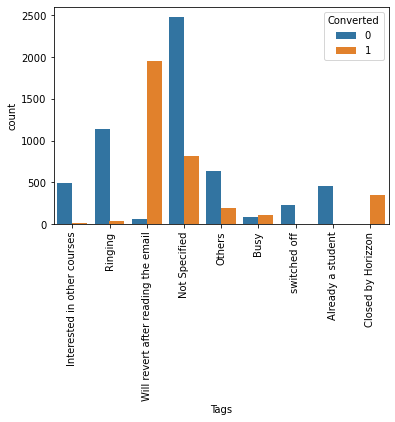

In [84]:
sns.countplot(x='Tags', hue='Converted', data=leads)
plt.xticks(rotation=90)
plt.show()

1. Leads who generally say they will respond after reading the email also convert the most.
2. Closed by Horizzon leads are also hot leads.
3. Leads interested in other courses, who do not pick up phones and who are already a student are the least interested leads.

In [85]:
leads['Last Notable Activity'].value_counts(normalize=True)*100

Modified                        37.011266
Email Opened                    30.759885
SMS Sent                        23.448200
Page Visited on Website          3.180915
Olark Chat Conversation          2.010161
Email Link Clicked               1.877623
Email Bounced                    0.651646
Unsubscribed                     0.485973
Unreachable                      0.353435
Had a Phone Conversation         0.143583
Email Marked Spam                0.022090
Approached upfront               0.011045
Resubscribed to emails           0.011045
View in browser link Clicked     0.011045
Form Submitted on Website        0.011045
Email Received                   0.011045
Name: Last Notable Activity, dtype: float64

In [86]:
#combining all low percentage levels to form one single categoty
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Form Submitted on Website','Unreachable','Unsubscribed','Had a Phone Conversation',
                                                    'Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam',
                                                   'Email Link Clicked','Resubscribed to emails','Email Bounced'], 'Others')

In [87]:
leads['Last Notable Activity'].value_counts(normalize=True)*100

Modified                   37.011266
Email Opened               30.759885
SMS Sent                   23.448200
Others                      3.589574
Page Visited on Website     3.180915
Olark Chat Conversation     2.010161
Name: Last Notable Activity, dtype: float64

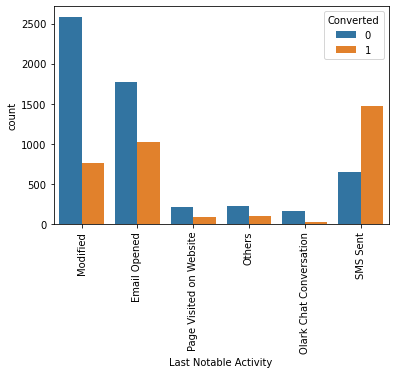

In [88]:
sns.countplot(x='Last Notable Activity', hue='Converted', data=leads)
plt.xticks(rotation=90)
plt.show()

1. Modified and Email Opened has max student leads.
2. Leads with Email Opened status converted more compared to ones with Modified status.
3. Olark Chat conversation doesnt seem to be working in converting student leads as well.
4. SMS Sent category has most conversions.

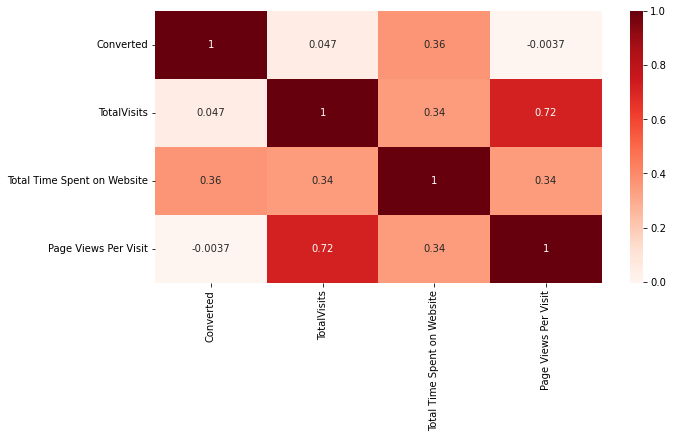

In [89]:
#caculating the correlation coefficients
plt.figure(figsize=(10,5))
sns.heatmap(leads.corr(), annot=True, cmap="Reds")
plt.show()

In [90]:
# Checking the shape again before going ahead with Data Prep
leads.shape

(9054, 14)

### DATA PREPARATION

In [91]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9054 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9054 non-null   object 
 1   Lead Source                             9054 non-null   object 
 2   Converted                               9054 non-null   int64  
 3   TotalVisits                             9054 non-null   float64
 4   Total Time Spent on Website             9054 non-null   int64  
 5   Page Views Per Visit                    9054 non-null   float64
 6   Last Activity                           9054 non-null   object 
 7   Specialization                          9054 non-null   object 
 8   What is your current occupation         9054 non-null   object 
 9   Tags                                    9054 non-null   object 
 10  Update me on Supply Chain Content       9054 non-null   obje

In [92]:
leads['Update me on Supply Chain Content'].value_counts(normalize=True)*100

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [93]:
# deleting the column 'Update me on Supply Chain Content'
leads.drop('Update me on Supply Chain Content', 1, inplace=True)

In [94]:
leads.shape

(9054, 13)

In [95]:
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [97]:
# mapping yes and no for te column : A free copy of Mastering The Interview

leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map({'Yes':1,'No':0})

In [98]:
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [101]:
leads['A free copy of Mastering The Interview'].value_counts(normalize=True)*100

0    69.096532
1    30.903468
Name: A free copy of Mastering The Interview, dtype: float64

#### Creating Dummy Variables for categorical variables

In [104]:
# getting all the categorical varibales
categ_cols=leads.select_dtypes(include=['object']).columns
categ_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [106]:
stats = pd.get_dummies(leads[categ_cols], drop_first=True)
stats.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Others,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Not Specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [107]:
leads = pd.concat([leads,stats], axis=1)
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Others,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Not Specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,0,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,0,Email Opened,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [108]:
#dropping the original columns for which dummies have been created
leads.drop(columns=categ_cols, axis=1, inplace=True)

In [109]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Others,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Not Specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


#### Train - Test Split

In [110]:
#importing sklearn and statsmodel libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [111]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Others,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Not Specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [112]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [113]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [114]:
scaler = MinMaxScaler()

In [115]:
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Others,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Not Specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2227,0.470588,0.250000,0.444444,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6875,0.235294,0.499120,0.444444,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
2173,0.294118,0.452025,0.555556,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4014,0.000000,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1585,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [116]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Others,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Not Specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000,6337.000000
mean,0.184444,0.213683,0.249601,0.310084,0.525801,0.079059,0.005839,0.311977,0.192047,0.120720,0.037557,0.061859,0.034717,0.029351,0.377781,0.107464,0.033454,0.069433,0.299195,0.044343,0.462522,0.020988,0.367051,0.048603,0.020830,0.023197,0.896639,0.077008,0.020514,0.039766,0.056967,0.362790,0.090264,0.125611,0.223607,0.027142,0.072590,0.051286,0.042765,0.078744,0.007890,0.369576,0.020199,0.035979,0.034086,0.237810
std,0.170115,0.242458,0.206069,0.462564,0.499373,0.269853,0.076194,0.463337,0.393941,0.325827,0.190138,0.240918,0.183076,0.168803,0.484871,0.309727,0.179834,0.254210,0.457942,0.205872,0.498633,0.143355,0.482039,0.215055,0.142826,0.150541,0.304454,0.266625,0.141763,0.195425,0.231798,0.480843,0.286582,0.331437,0.416695,0.162510,0.259482,0.220598,0.202342,0.269360,0.088482,0.482728,0.140691,0.186253,0.181463,0.425776
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.003961,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.176471,0.106954,0.222222,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.235294,0.409771,0.333333,1.000000,1.000000,0.0

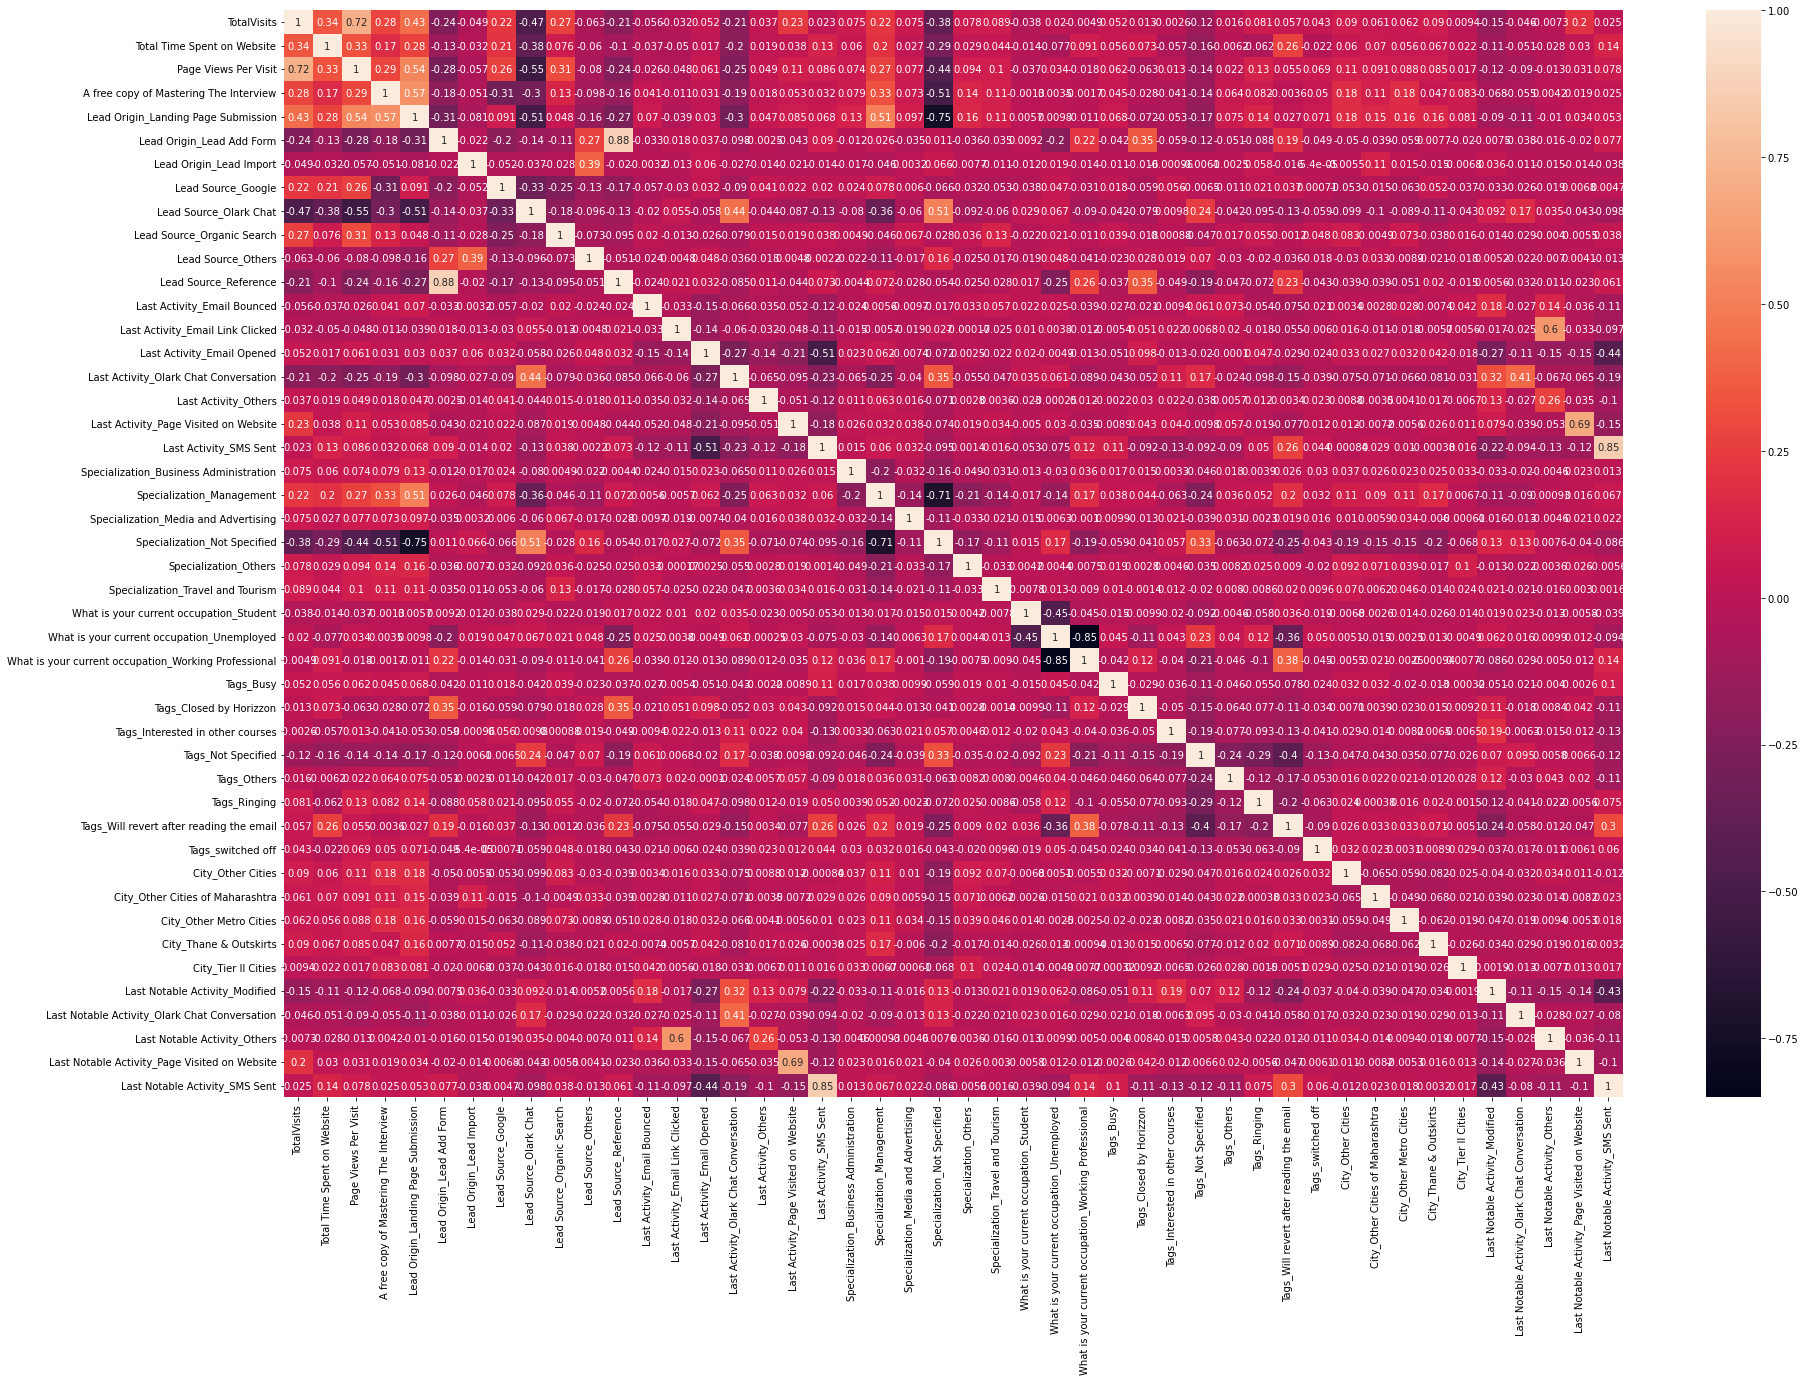

In [119]:
#Checking correlation
plt.figure(figsize = (30,20))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### MODEL BUILDING

##### using RFE for feature selection- coarse tuning

In [130]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=20)            
rfe = rfe.fit(X_train, y_train)

In [131]:
rfe.support_

array([ True,  True,  True, False, False,  True,  True, False,  True,
       False, False,  True, False, False,  True, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True])

In [132]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 21),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Others', False, 2),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Clicked', False, 27),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 5),
 ('Last Activity_Others', False, 12),
 ('Last Activity_Page Visited on Website', False, 24),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 22),
 ('Specialization_Management', False, 16),
 ('Specialization_Media and Advertising', False, 15),
 ('Specialization_Not Specified', False, 1

In [133]:
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Not Specified', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Model - 1

In [134]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6337
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1422.2
Date:                Tue, 24 Jan 2023   Deviance:                       2844.4
Time:                        02:21:34   Pearson chi2:                 7.81e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5869
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.8524      0.737     -9.302      0.000      -8.296      -5.409
TotalVisits                                              2.0835      0.398      5.233      0.000       1.303       2.864
Total Time Spent on Website                              4.2257      0.230     18.386      0.000       3.775       4.676
Page Views Per Visit                                    -2.5852      0.407     -6.350      0.000      -3.383      -1.787
Lead Origin_Lead Add Form                                4.9279      0.619      7.963      0.000       3.715       6.141
Lead Origin_Lead Import                                 -0.6504      0.776     -0.839      0.402      -2.171       0.870
Lead Source_Olark Chat                                   0.8647      0.172      5.030      0.000       0.528       1.202
Lead Source_Reference                                   -3.8999      0.693     -5.631      0.000      -5.257      -2.542
Last Activity_Email Opened                               1.2033      0.126      9.537      0.000       0.956       1.451
Last Activity_SMS Sent                                   1.2183      0.201      6.062      0.000       0.824       1.612
Specialization_Travel and Tourism                       -0.8533      0.381     -2.243      0.025      -1.599      -0.108
What is your current occupation_Working Professional     1.0545      0.310      3.399      0.001       0.446       1.662
Tags_Busy                                                4.2190      0.753      5.599      0.000       2.742       5.696
Tags_Closed by Horizzon                                 10.1078      1.244      8.126      0.000       7.670      12.546
Tags_Interested in other courses                         0.8552      0.838      1.021      0.307      -0.787       2.497
Tags_Not Specified                                       3.3580      0.720      4.661      0.000       1.946       4.770
Tags_Others                                              3.7207      0.727      5.119      0.000       2.296       5.145
Tags_Ringing                                             0.1296      0.757      0.171      0.864      -1.355       1.614
Tags_Will revert after reading the email                 7.7052      0.738     10.441      0.000       6.259       9.152
Tags_switched off                                       -0.4075      0.948     -0.430      0.667      -2.265       1.450
Last Notable Activity_SMS Sent                           2.0038      0.200      9.999      0.000       1.611       2.397
========================================================================================================================
"""

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [136]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.20
8,Last Activity_SMS Sent,5.95
3,Lead Origin_Lead Add Form,5.19
19,Last Notable Activity_SMS Sent,5.12
6,Lead Source_Reference,4.89
0,TotalVisits,4.70
17,Tags_Will revert after reading the email,3.65
14,Tags_Not Specified,3.40
1,Total Time Spent on Website,2.45
7,Last Activity_Email Opened,2.26


#### There are variables with p value > 0.05. Let's drop them one by one

In [137]:
# Droppingn tags_ringing with highest p value of 0.864
col = col.drop('Tags_Ringing',1)

#### Model - 2

In [138]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6337
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1422.2
Date:                Tue, 24 Jan 2023   Deviance:                       2844.4
Time:                        02:24:58   Pearson chi2:                 7.80e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5869
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.7374      0.292    -23.068      0.000      -7.310      -6.165
TotalVisits                                              2.0848      0.398      5.237      0.000       1.305       2.865
Total Time Spent on Website                              4.2261      0.230     18.389      0.000       3.776       4.677
Page Views Per Visit                                    -2.5851      0.407     -6.349      0.000      -3.383      -1.787
Lead Origin_Lead Add Form                                4.9286      0.619      7.964      0.000       3.716       6.141
Lead Origin_Lead Import                                 -0.6494      0.776     -0.837      0.403      -2.170       0.871
Lead Source_Olark Chat                                   0.8648      0.172      5.030      0.000       0.528       1.202
Lead Source_Reference                                   -3.8994      0.693     -5.629      0.000      -5.257      -2.542
Last Activity_Email Opened                               1.2032      0.126      9.537      0.000       0.956       1.450
Last Activity_SMS Sent                                   1.2189      0.201      6.066      0.000       0.825       1.613
Specialization_Travel and Tourism                       -0.8539      0.381     -2.244      0.025      -1.600      -0.108
What is your current occupation_Working Professional     1.0539      0.310      3.399      0.001       0.446       1.662
Tags_Busy                                                4.1023      0.312     13.138      0.000       3.490       4.714
Tags_Closed by Horizzon                                  9.9921      1.042      9.594      0.000       7.951      12.033
Tags_Interested in other courses                         0.7394      0.489      1.513      0.130      -0.218       1.697
Tags_Not Specified                                       3.2420      0.233     13.917      0.000       2.785       3.699
Tags_Others                                              3.6050      0.256     14.083      0.000       3.103       4.107
Tags_Will revert after reading the email                 7.5896      0.288     26.398      0.000       7.026       8.153
Tags_switched off                                       -0.5250      0.649     -0.809      0.419      -1.797       0.747
Last Notable Activity_SMS Sent                           2.0059      0.200     10.027      0.000       1.614       2.398
========================================================================================================================
"""

In [139]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_SMS Sent,5.80
2,Page Views Per Visit,5.66
3,Lead Origin_Lead Add Form,5.14
18,Last Notable Activity_SMS Sent,5.10
6,Lead Source_Reference,4.88
0,TotalVisits,4.62
16,Tags_Will revert after reading the email,2.62
1,Total Time Spent on Website,2.41
14,Tags_Not Specified,2.36
7,Last Activity_Email Opened,2.05


#### Tags_switched off has high p value of 0.419 so let's drop that and check the VIFs again

In [140]:
col = col.drop('Tags_switched off',1)

#### Model - 3

In [142]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6337
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1422.6
Date:                Tue, 24 Jan 2023   Deviance:                       2845.1
Time:                        02:28:21   Pearson chi2:                 7.83e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5868
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.8063      0.284    -24.007      0.000      -7.362      -6.251
TotalVisits                                              2.0811      0.398      5.228      0.000       1.301       2.861
Total Time Spent on Website                              4.2271      0.230     18.399      0.000       3.777       4.677
Page Views Per Visit                                    -2.5821      0.407     -6.345      0.000      -3.380      -1.784
Lead Origin_Lead Add Form                                4.9288      0.619      7.965      0.000       3.716       6.142
Lead Origin_Lead Import                                 -0.6455      0.776     -0.831      0.406      -2.167       0.876
Lead Source_Olark Chat                                   0.8653      0.172      5.035      0.000       0.528       1.202
Lead Source_Reference                                   -3.8939      0.693     -5.618      0.000      -5.252      -2.535
Last Activity_Email Opened                               1.2035      0.126      9.539      0.000       0.956       1.451
Last Activity_SMS Sent                                   1.2169      0.201      6.058      0.000       0.823       1.611
Specialization_Travel and Tourism                       -0.8579      0.380     -2.258      0.024      -1.602      -0.113
What is your current occupation_Working Professional     1.0544      0.310      3.400      0.001       0.447       1.662
Tags_Busy                                                4.1720      0.304     13.727      0.000       3.576       4.768
Tags_Closed by Horizzon                                 10.0586      1.039      9.677      0.000       8.021      12.096
Tags_Interested in other courses                         0.8077      0.484      1.670      0.095      -0.140       1.756
Tags_Not Specified                                       3.3110      0.222     14.909      0.000       2.876       3.746
Tags_Others                                              3.6735      0.246     14.915      0.000       3.191       4.156
Tags_Will revert after reading the email                 7.6577      0.279     27.437      0.000       7.111       8.205
Last Notable Activity_SMS Sent                           2.0059      0.200     10.029      0.000       1.614       2.398
========================================================================================================================
"""

In [143]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_SMS Sent,5.80
2,Page Views Per Visit,5.59
3,Lead Origin_Lead Add Form,5.13
17,Last Notable Activity_SMS Sent,5.10
6,Lead Source_Reference,4.88
0,TotalVisits,4.61
16,Tags_Will revert after reading the email,2.53
1,Total Time Spent on Website,2.40
14,Tags_Not Specified,2.27
7,Last Activity_Email Opened,2.04


#### Dropping Lead Origin_Lead Import with p value of 0.406

In [144]:
col = col.drop('Lead Origin_Lead Import',1)

#### Model - 4

In [145]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6337
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1422.9
Date:                Tue, 24 Jan 2023   Deviance:                       2845.9
Time:                        02:31:09   Pearson chi2:                 7.85e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5868
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.8234      0.283    -24.111      0.000      -7.378      -6.269
TotalVisits                                              2.0903      0.398      5.252      0.000       1.310       2.870
Total Time Spent on Website                              4.2363      0.230     18.458      0.000       3.786       4.686
Page Views Per Visit                                    -2.5530      0.405     -6.298      0.000      -3.348      -1.759
Lead Origin_Lead Add Form                                4.9468      0.618      7.999      0.000       3.735       6.159
Lead Source_Olark Chat                                   0.8822      0.171      5.167      0.000       0.548       1.217
Lead Source_Reference                                   -3.8920      0.693     -5.615      0.000      -5.250      -2.534
Last Activity_Email Opened                               1.2000      0.126      9.515      0.000       0.953       1.447
Last Activity_SMS Sent                                   1.2042      0.200      6.006      0.000       0.811       1.597
Specialization_Travel and Tourism                       -0.8550      0.380     -2.250      0.024      -1.600      -0.110
What is your current occupation_Working Professional     1.0549      0.310      3.400      0.001       0.447       1.663
Tags_Busy                                                4.1766      0.304     13.741      0.000       3.581       4.772
Tags_Closed by Horizzon                                 10.0596      1.039      9.679      0.000       8.023      12.097
Tags_Interested in other courses                         0.8095      0.484      1.673      0.094      -0.139       1.758
Tags_Not Specified                                       3.3127      0.222     14.920      0.000       2.878       3.748
Tags_Others                                              3.6763      0.246     14.930      0.000       3.194       4.159
Tags_Will revert after reading the email                 7.6548      0.279     27.439      0.000       7.108       8.202
Last Notable Activity_SMS Sent                           2.0169      0.200     10.099      0.000       1.626       2.408
========================================================================================================================
"""

In [146]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,5.76
2,Page Views Per Visit,5.58
3,Lead Origin_Lead Add Form,5.13
16,Last Notable Activity_SMS Sent,5.09
5,Lead Source_Reference,4.88
0,TotalVisits,4.61
15,Tags_Will revert after reading the email,2.53
1,Total Time Spent on Website,2.40
13,Tags_Not Specified,2.27
6,Last Activity_Email Opened,2.01


#### Dropping Tags_Interested in other courses with p value of 0.094

In [148]:
col = col.drop('Tags_Interested in other courses',1)

#### Model - 5

In [149]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6337
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1424.1
Date:                Tue, 24 Jan 2023   Deviance:                       2848.3
Time:                        02:33:55   Pearson chi2:                 7.57e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5866
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.6967      0.267    -25.089      0.000      -7.220      -6.173
TotalVisits                                              2.0697      0.397      5.213      0.000       1.292       2.848
Total Time Spent on Website                              4.2376      0.229     18.472      0.000       3.788       4.687
Page Views Per Visit                                    -2.5382      0.405     -6.272      0.000      -3.331      -1.745
Lead Origin_Lead Add Form                                4.9451      0.618      7.998      0.000       3.733       6.157
Lead Source_Olark Chat                                   0.8831      0.171      5.176      0.000       0.549       1.217
Lead Source_Reference                                   -3.8876      0.693     -5.609      0.000      -5.246      -2.529
Last Activity_Email Opened                               1.1968      0.126      9.483      0.000       0.949       1.444
Last Activity_SMS Sent                                   1.1985      0.201      5.974      0.000       0.805       1.592
Specialization_Travel and Tourism                       -0.8483      0.380     -2.233      0.026      -1.593      -0.104
What is your current occupation_Working Professional     1.0771      0.314      3.435      0.001       0.462       1.692
Tags_Busy                                                4.0623      0.291     13.965      0.000       3.492       4.632
Tags_Closed by Horizzon                                  9.9307      1.035      9.595      0.000       7.902      11.959
Tags_Not Specified                                       3.1935      0.203     15.718      0.000       2.795       3.592
Tags_Others                                              3.5529      0.229     15.544      0.000       3.105       4.001
Tags_Will revert after reading the email                 7.5281      0.263     28.647      0.000       7.013       8.043
Last Notable Activity_SMS Sent                           1.9985      0.199     10.027      0.000       1.608       2.389
========================================================================================================================
"""

In [150]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_SMS Sent,5.76
2,Page Views Per Visit,5.45
3,Lead Origin_Lead Add Form,5.10
15,Last Notable Activity_SMS Sent,5.07
5,Lead Source_Reference,4.88
0,TotalVisits,4.60
14,Tags_Will revert after reading the email,2.41
1,Total Time Spent on Website,2.38
12,Tags_Not Specified,2.11
6,Last Activity_Email Opened,2.01


#### No more variables with p value > 0.05 so we'll start eliminating highly multicorrelated variables based on their VIF values

#### Dropping Last Activity_SMS Sent with VIF of 5.76

In [151]:
col = col.drop('Last Activity_SMS Sent',1)

#### Model - 6

In [152]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6337
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1441.1
Date:                Tue, 24 Jan 2023   Deviance:                       2882.3
Time:                        02:38:17   Pearson chi2:                 7.54e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5844
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.4341      0.260    -24.785      0.000      -6.943      -5.925
TotalVisits                                              1.9491      0.396      4.927      0.000       1.174       2.724
Total Time Spent on Website                              4.2339      0.228     18.538      0.000       3.786       4.682
Page Views Per Visit                                    -2.4054      0.404     -5.955      0.000      -3.197      -1.614
Lead Origin_Lead Add Form                                5.0275      0.618      8.141      0.000       3.817       6.238
Lead Source_Olark Chat                                   0.8103      0.168      4.809      0.000       0.480       1.140
Lead Source_Reference                                   -3.7883      0.695     -5.451      0.000      -5.151      -2.426
Last Activity_Email Opened                               0.9282      0.114      8.148      0.000       0.705       1.151
Specialization_Travel and Tourism                       -0.8383      0.381     -2.199      0.028      -1.585      -0.091
What is your current occupation_Working Professional     1.1374      0.315      3.616      0.000       0.521       1.754
Tags_Busy                                                4.1312      0.292     14.168      0.000       3.560       4.703
Tags_Closed by Horizzon                                  9.8706      1.035      9.539      0.000       7.843      11.899
Tags_Not Specified                                       3.2166      0.203     15.861      0.000       2.819       3.614
Tags_Others                                              3.5387      0.227     15.556      0.000       3.093       3.985
Tags_Will revert after reading the email                 7.4899      0.260     28.768      0.000       6.980       8.000
Last Notable Activity_SMS Sent                           2.9131      0.138     21.141      0.000       2.643       3.183
========================================================================================================================
"""

In [153]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.33
3,Lead Origin_Lead Add Form,5.08
5,Lead Source_Reference,4.88
0,TotalVisits,4.60
1,Total Time Spent on Website,2.38
13,Tags_Will revert after reading the email,2.38
11,Tags_Not Specified,2.06
6,Last Activity_Email Opened,1.87
14,Last Notable Activity_SMS Sent,1.79
4,Lead Source_Olark Chat,1.59


#### Dropping Page Views Per Visit with VIF of 5.33

In [154]:
col = col.drop('Page Views Per Visit',1)

#### Model - 7

In [155]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6337
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1459.6
Date:                Tue, 24 Jan 2023   Deviance:                       2919.3
Time:                        02:40:01   Pearson chi2:                 8.02e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5819
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.8538      0.253    -27.046      0.000      -7.350      -6.357
TotalVisits                                              0.6943      0.344      2.018      0.044       0.020       1.369
Total Time Spent on Website                              4.2311      0.227     18.606      0.000       3.785       4.677
Lead Origin_Lead Add Form                                5.4585      0.614      8.889      0.000       4.255       6.662
Lead Source_Olark Chat                                   1.2566      0.153      8.206      0.000       0.956       1.557
Lead Source_Reference                                   -3.7486      0.694     -5.402      0.000      -5.109      -2.389
Last Activity_Email Opened                               0.8845      0.113      7.819      0.000       0.663       1.106
Specialization_Travel and Tourism                       -0.9146      0.379     -2.415      0.016      -1.657      -0.172
What is your current occupation_Working Professional     1.0671      0.316      3.380      0.001       0.448       1.686
Tags_Busy                                                4.0916      0.291     14.067      0.000       3.522       4.662
Tags_Closed by Horizzon                                  9.8543      1.034      9.534      0.000       7.828      11.880
Tags_Not Specified                                       3.2225      0.202     15.957      0.000       2.827       3.618
Tags_Others                                              3.5376      0.227     15.614      0.000       3.094       3.982
Tags_Will revert after reading the email                 7.4179      0.258     28.751      0.000       6.912       7.924
Last Notable Activity_SMS Sent                           2.8094      0.135     20.820      0.000       2.545       3.074
========================================================================================================================
"""

In [156]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,5.03
4,Lead Source_Reference,4.88
0,TotalVisits,2.43
12,Tags_Will revert after reading the email,2.37
1,Total Time Spent on Website,2.35
10,Tags_Not Specified,1.99
5,Last Activity_Email Opened,1.76
13,Last Notable Activity_SMS Sent,1.70
3,Lead Source_Olark Chat,1.52
9,Tags_Closed by Horizzon,1.46


#### Dropping Lead Origin_Lead Add Form with VIF of 5.03

In [157]:
col = col.drop('Lead Origin_Lead Add Form',1)

 #### Model - 8

In [158]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6337
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1574.2
Date:                Tue, 24 Jan 2023   Deviance:                       3148.4
Time:                        02:43:27   Pearson chi2:                 7.63e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5665
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.3370      0.239    -26.523      0.000      -6.805      -5.869
TotalVisits                                             -0.5558      0.335     -1.659      0.097      -1.213       0.101
Total Time Spent on Website                              3.6071      0.215     16.810      0.000       3.187       4.028
Lead Source_Olark Chat                                   0.6055      0.139      4.343      0.000       0.332       0.879
Lead Source_Reference                                    1.1873      0.352      3.371      0.001       0.497       1.878
Last Activity_Email Opened                               0.9434      0.108      8.715      0.000       0.731       1.156
Specialization_Travel and Tourism                       -1.0129      0.365     -2.774      0.006      -1.729      -0.297
What is your current occupation_Working Professional     0.9721      0.311      3.131      0.002       0.363       1.581
Tags_Busy                                                4.0475      0.289     14.012      0.000       3.481       4.614
Tags_Closed by Horizzon                                 10.1311      1.031      9.830      0.000       8.111      12.151
Tags_Not Specified                                       3.3994      0.199     17.084      0.000       3.009       3.789
Tags_Others                                              3.5799      0.223     16.043      0.000       3.142       4.017
Tags_Will revert after reading the email                 7.4251      0.255     29.162      0.000       6.926       7.924
Last Notable Activity_SMS Sent                           2.8842      0.131     22.077      0.000       2.628       3.140
========================================================================================================================
"""

In [159]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.39
11,Tags_Will revert after reading the email,2.35
1,Total Time Spent on Website,2.33
9,Tags_Not Specified,1.91
4,Last Activity_Email Opened,1.74
12,Last Notable Activity_SMS Sent,1.67
3,Lead Source_Reference,1.51
2,Lead Source_Olark Chat,1.49
8,Tags_Closed by Horizzon,1.42
6,What is your current occupation_Working Profes...,1.34


#### Dropping TotalVisits as it's p value has gone up to 0.097

In [160]:
col = col.drop('TotalVisits',1)

#### Model -9

In [161]:
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6337
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1575.6
Date:                Tue, 24 Jan 2023   Deviance:                       3151.2
Time:                        02:45:35   Pearson chi2:                 7.71e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5664
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.4531      0.229    -28.145      0.000      -6.902      -6.004
Total Time Spent on Website                              3.5600      0.212     16.772      0.000       3.144       3.976
Lead Source_Olark Chat                                   0.7086      0.125      5.657      0.000       0.463       0.954
Lead Source_Reference                                    1.2954      0.346      3.747      0.000       0.618       1.973
Last Activity_Email Opened                               0.9353      0.108      8.657      0.000       0.724       1.147
Specialization_Travel and Tourism                       -1.0334      0.367     -2.814      0.005      -1.753      -0.314
What is your current occupation_Working Professional     0.9796      0.311      3.150      0.002       0.370       1.589
Tags_Busy                                                4.0362      0.288     14.006      0.000       3.471       4.601
Tags_Closed by Horizzon                                 10.1139      1.030      9.815      0.000       8.094      12.133
Tags_Not Specified                                       3.4072      0.199     17.129      0.000       3.017       3.797
Tags_Others                                              3.5832      0.223     16.060      0.000       3.146       4.021
Tags_Will revert after reading the email                 7.4157      0.254     29.149      0.000       6.917       7.914
Last Notable Activity_SMS Sent                           2.8897      0.131     22.121      0.000       2.634       3.146
========================================================================================================================
"""

In [162]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,2.28
0,Total Time Spent on Website,2.13
8,Tags_Not Specified,1.76
11,Last Notable Activity_SMS Sent,1.62
3,Last Activity_Email Opened,1.61
2,Lead Source_Reference,1.46
1,Lead Source_Olark Chat,1.39
7,Tags_Closed by Horizzon,1.39
5,What is your current occupation_Working Profes...,1.34
9,Tags_Others,1.15


#### Now with this all the variables have p values less than 0.05 and VIF less than 5. So this is our final model.

In [163]:
#Prediction of Y - values, as per the final model.
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2227    0.942019
6875    0.009228
2173    0.007815
4014    0.931281
1585    0.994221
2901    0.088079
1209    0.014574
4233    0.996091
1706    0.006524
5631    0.570913
dtype: float64

In [164]:
#Reshaping the predicted probabilities so that it returns an array of Conversion_Probabilities.
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.94201897, 0.00922808, 0.00781479, 0.93128104, 0.99422059,
       0.08807938, 0.01457424, 0.99609053, 0.00652382, 0.5709135 ])

In [165]:
#Creating a data frame with the actual Converted score and Probability of conversion
#The dataframe is stored in the variable y_train_pred_final.

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Cust_Id'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id
0,1,0.942019,2227
1,0,0.009228,6875
2,0,0.007815,2173
3,1,0.931281,4014
4,1,0.994221,1585


In [166]:
#Mapping the prediction conversion Rate according to the probability cut off of 0.5.
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id,predicted
0,1,0.942019,2227,1
1,0,0.009228,6875,0
2,0,0.007815,2173,0
3,1,0.931281,4014,1
4,1,0.994221,1585,1


#### Calculation of Metrics

In [167]:
#Importing the required libraries for metric calculation
from sklearn import metrics

# Confusion matrix - Final Model 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3674  224]
 [ 437 2002]]


In [168]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8956919678081111


#### We have an accuracy of 89.5%

In [169]:
#Calculation of Final Model characteristics.
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [170]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8208282082820828

In [171]:
# Let us calculate specificity
TN / float(TN+FP)

0.9425346331452027

In [172]:
# Calculate False Postive Rate 
print(FP/ float(TN+FP))

0.057465366854797334


In [173]:
# positive predictive value 
print (TP / float(TP+FP))

0.89937106918239


In [174]:
#Negative predictive value
print (TN / float(TN+ FN))

0.8936998297251277


#### Plotting ROC curve

In [175]:
#Function to plot and draw ROC curve.
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [176]:
#Calculation and FPR and TPR and thresholds for trade off Sensitivity and Specificity.
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

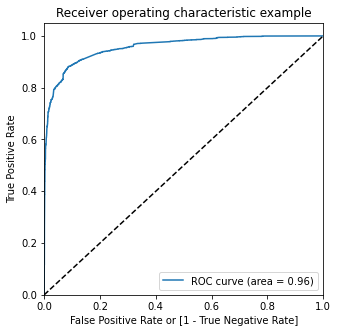

In [177]:
#Invoking the function to plot ROC - Curve. 
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### ROC curve value is coming out to be 0.96 which is indicative of a good predictive model.

#### Optimal Cut-Off

In [179]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.942019,2227,1,1,1,1,1,1,1,1,1,1,1
1,0,0.009228,6875,0,1,0,0,0,0,0,0,0,0,0
2,0,0.007815,2173,0,1,0,0,0,0,0,0,0,0,0
3,1,0.931281,4014,1,1,1,1,1,1,1,1,1,1,1
4,1,0.994221,1585,1,1,1,1,1,1,1,1,1,1,1


In [180]:
#Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384882  1.000000  0.000000
0.1   0.1  0.781600  0.970890  0.663161
0.2   0.2  0.880227  0.910209  0.861467
0.3   0.3  0.896639  0.885199  0.903797
0.4   0.4  0.901531  0.863879  0.925090
0.5   0.5  0.895692  0.820828  0.942535
0.6   0.6  0.899164  0.799508  0.961519
0.7   0.7  0.888906  0.750308  0.975629
0.8   0.8  0.880858  0.717097  0.983325
0.9   0.9  0.857346  0.644936  0.990251


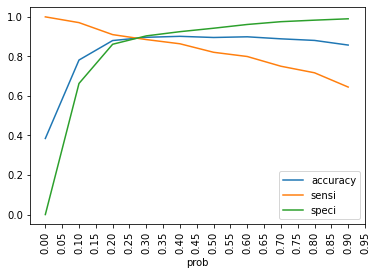

<Figure size 792x792 with 0 Axes>

In [189]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.05), rotation = 90)
plt.figure(figsize=(11,11))
plt.show()

#### Taking the optimal cut-off as 0.28

In [215]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Cust_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
0,1,0.942019,2227,1,1,1,1,1,1,1,1,1,1,1,1,94
1,0,0.009228,6875,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0.007815,2173,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0.931281,4014,1,1,1,1,1,1,1,1,1,1,1,1,93
4,1,0.994221,1585,1,1,1,1,1,1,1,1,1,1,1,1,99


##### Calculating the Lead Score

In [216]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Conversion_Prob','Cust_Id','final_Predicted','Lead_Score']].head()

,Converted,Conversion_Prob,Cust_Id,final_Predicted,Lead_Score
0,1,0.942019,2227,1,94
1,0,0.009228,6875,0,1
2,0,0.007815,2173,0,1
3,1,0.931281,4014,1,93
4,1,0.994221,1585,1,99


#### Checking the accuracy and other metrices after the optimal cut-off

In [217]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.895060754300142

In [218]:
#Confusion matrix after probability cutoff : 0.35 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3506,  392],
       [ 273, 2166]], dtype=int64)

In [219]:
#Confusion Matrix - Calculating all parameters.
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [220]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8880688806888068

In [221]:
#Let us calculate specificity
TN / float(TN+FP)

0.8994356080041047

### Model Outcome:
1. Accuracy - 89.5%
2. Sensitivity - 88.8%
3. Specificity - 89.9%

### MODEL EVALUATION

In [201]:
#Perform all the scaling on the available features.
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [202]:
#Selecting all the features, which are selected in the final model


X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email Opened,Specialization_Travel and Tourism,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Not Specified,Tags_Others,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
2445,0.002201,0,0,0,0,0,0,0,1,0,0,0
3069,0.000000,0,1,0,0,1,0,0,0,0,1,1
4360,0.597271,0,0,1,0,1,0,0,0,0,1,0
7597,0.000000,1,0,0,0,0,0,0,1,0,0,0
6437,0.000000,1,0,1,0,0,0,0,0,0,0,0


In [203]:
X_test_sm = sm.add_constant(X_test)

In [205]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2445    0.045734
3069    0.997822
4360    0.993332
7597    0.088079
6437    0.008089
7502    0.002005
8790    0.990744
2991    0.167355
7584    0.084710
8342    0.017559
dtype: float64

In [206]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2445,0.045734
3069,0.997822
4360,0.993332
7597,0.088079
6437,0.008089


In [208]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
2445,0
3069,1
4360,1
7597,0
6437,0


In [209]:
#Putting CustID to index
y_test_df['CustID'] = y_test_df.index



In [211]:
#Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [212]:
#Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [213]:
y_pred_final.head()

,Converted,CustID,0
0,0,2445,0.045734
1,1,3069,0.997822
2,1,4360,0.993332
3,0,7597,0.088079
4,0,6437,0.008089


In [223]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,CustID,Converted_Prob
0,0,2445,0.045734
1,1,3069,0.997822
2,1,4360,0.993332
3,0,7597,0.088079
4,0,6437,0.008089


In [225]:
#Predicting the test model on cut off probabilty
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.28 else 0)
y_pred_final.head(10)

,Converted,CustID,Converted_Prob,final_predicted
0,0,2445,0.045734,0
1,1,3069,0.997822,1
2,1,4360,0.993332,1
3,0,7597,0.088079,0
4,0,6437,0.008089,0
5,0,7502,0.002005,0
6,1,8790,0.990744,1
7,0,2991,0.167355,0
8,0,7584,0.084710,0
9,0,8342,0.017559,0


In [226]:
#Adding lead Score column
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_pred_final.head()


,Converted,CustID,Converted_Prob,final_predicted,Lead_Score
0,0,2445,0.045734,0,5
1,1,3069,0.997822,1,100
2,1,4360,0.993332,1,99
3,0,7597,0.088079,0,9
4,0,6437,0.008089,0,1


#### Calculation of Metrics

In [228]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9002576370997424

In [229]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1536,  154],
       [ 117,  910]], dtype=int64)

In [230]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [231]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8860759493670886

In [232]:
# Let us calculate specificity
TN / float(TN+FP)

0.9088757396449704

### FINAL OBSERVATION AND INFERENCES:

#### Train Data:
1. Accuracy - 89.5%
2. Sensitivity - 88.8%
3. Specificity - 89.9%

#### Test Data:
1. Accuracy - 90%
2. Sensitivity - 88.6%
3. Specificity - 90.8%

##### Inferences:
1. The organisation should focus on improving their website both UI and UX wise. They can also make it more informatie as it has been observed that leads who spend a lot of time on the website are hot leads.
2. Leads generated through past referrals are hot leads.
3. Leads with Tags : Email Opened, Will revert after reading the mail and SMS Sent seem to resulting in a conversion.
4. Leads closed by horizzon have a very strong chance of actually becoming a customer.
5. The company should focus more on Working Professionals specially at manager levels as there is a high chance of them getting converted as they could be looking for a boost in their current role.
6. Leads generated by Add Forms are also hot leads.